In [8]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [9]:
%run 'cross_validation/functions.ipynb'

In [10]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [11]:
import plotly.graph_objects as go

hyperparameters = {'n_estimators': 120, 'max_depth': 10, 'max_features': 'sqrt'}

In [12]:
predict_cruise(hyperparameters, 'pro')

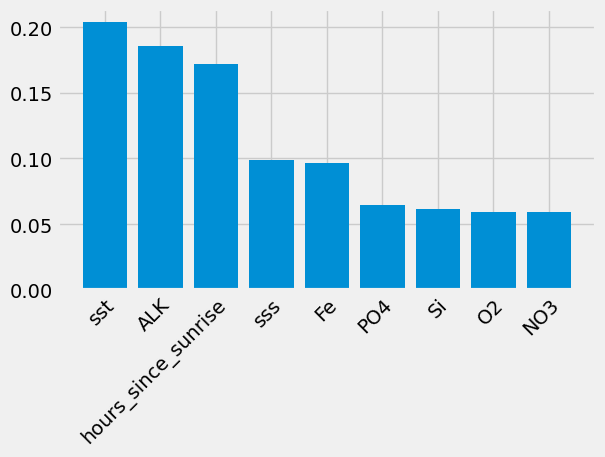

In [13]:
feature_importance('pro',feature_list_pro)

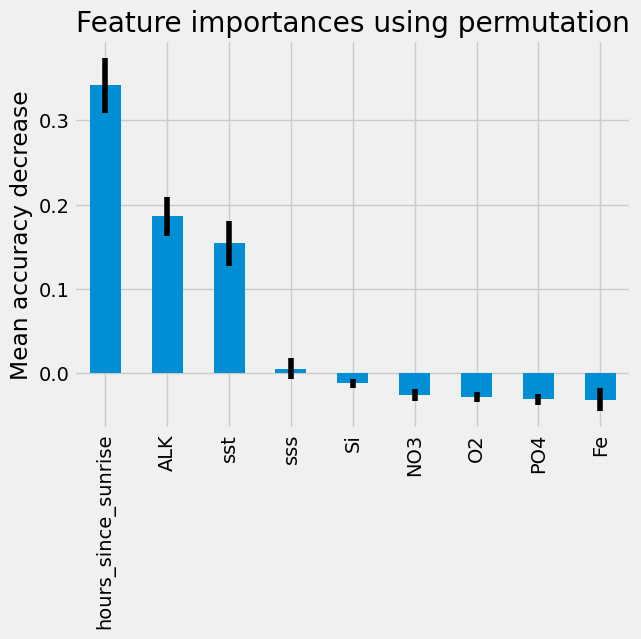

In [14]:
permutation_importances('pro', test_features, test_labels, feature_list_pro)

In [15]:
'NO3', 'O2', 'Si', 'PO4', 'Fe', 'sss'

('NO3', 'O2', 'Si', 'PO4', 'Fe', 'sss')

In [16]:
predictions, maes, rmses, old_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

####  Removing O2 and NO3 as they were the worst performing nutrients

In [17]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)


In [18]:
predict_cruise(hyperparameters, 'pro')

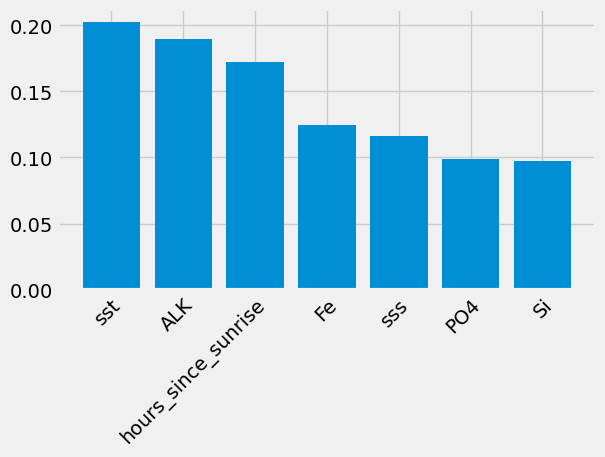

In [19]:
feature_importance('pro',feature_list_pro)

In [20]:
predictions, maes, rmses, nutrient_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

#### Now we will see whether removing features with low importance improves the accuracy of the model

In [21]:
list_of_rmse = {'original': old_rmse,  
                'nutrients': nutrient_rmse}
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['nutrients'])/sorted_rmse['original'] * 100, '%' )

{'nutrients': 2.884299780505625, 'original': 2.9144836961405955}
the percent improvement is: 1.0356522383343776 %


####  Although not a big difference, removing those 2 variables had a ~1% improvement in model performance.  
#### Now we will try removing everything but the 5 highest performing variables, which are ALK, SSS, SST, Hours, and Fe

In [22]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2', 'Si', 'PO4'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [23]:
predict_cruise(hyperparameters,'pro')

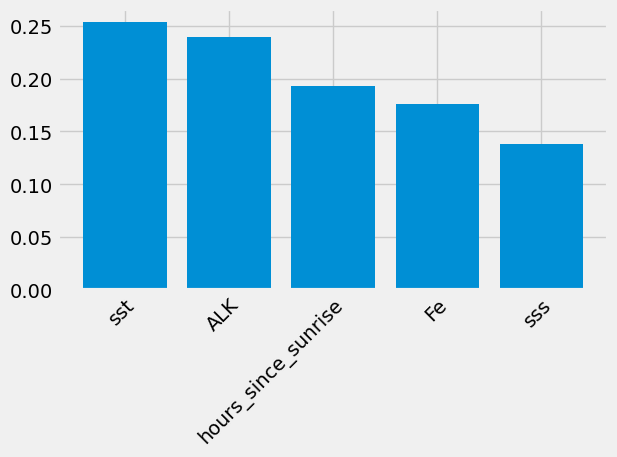

In [24]:
feature_importance('pro',feature_list_pro)

In [25]:
predictions, maes, rmses, more_nutrients_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [26]:
list_of_rmse['max'] = more_nutrients_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['max'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.861116085374536, 'nutrients': 2.884299780505625, 'original': 2.9144836961405955}
the percent improvement is: 1.8311171490418658 %


#### Since this was only a 3% improvement, we can't say for certain whether this will help or hurt the accuracy of our final predictions

### Now we will remove hours_since_sunrise, since it is not useful for the global predictions that we will be doing later

In [27]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['hours_since_sunrise'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [28]:
predict_cruise(hyperparameters, 'pro')

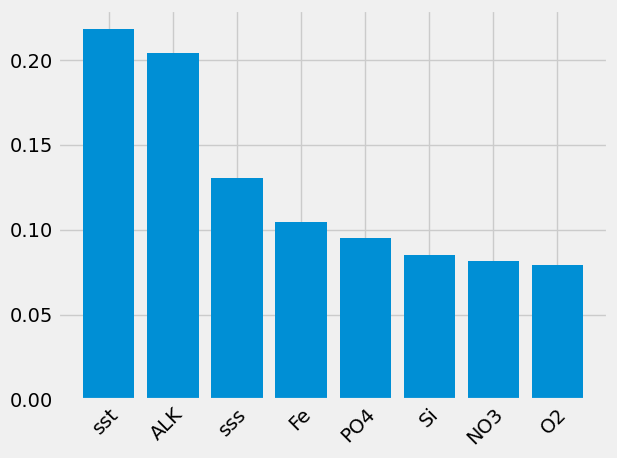

In [29]:
feature_importance('pro',feature_list_pro)

In [30]:
predictions, maes, rmses, sunrise_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [31]:
list_of_rmse['sunrise'] = sunrise_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['sunrise'])/sorted_rmse['original'] * 100, '%' )

{'max': 2.861116085374536, 'nutrients': 2.884299780505625, 'original': 2.9144836961405955, 'sunrise': 3.1965740858136718}
the percent improvement is: -9.67891465807905 %


Removing hours_since_sunrise remove's the models ability to predict the diel cycle of prochlorococcus, so the model has a ~10% higher RMSE

In [32]:
test_features[0]

array([[1.95264180e+03, 3.45717163e+01, 2.56531183e+01, ...,
        4.26927778e-07, 3.45150967e-01, 9.46470396e+00],
       [1.95264180e+03, 3.46093165e+01, 2.56462433e+01, ...,
        4.26927778e-07, 3.45150967e-01, 9.46470396e+00],
       [1.95380275e+03, 3.46269515e+01, 2.52466600e+01, ...,
        5.19963705e-07, 3.50773454e-01, 9.54816445e+00],
       ...,
       [1.99298710e+03, 3.48230815e+01, 2.42527017e+01, ...,
        2.44386942e-06, 2.41563171e-01, 1.24849830e+01],
       [1.99482562e+03, 3.48230815e+01, 2.42527017e+01, ...,
        2.44386942e-06, 2.41563171e-01, 1.24849830e+01],
       [1.99482562e+03, 3.48861919e+01, 2.42539517e+01, ...,
        8.19799708e-05, 2.40708765e-01, 1.26634836e+01]])

In [33]:
drop = True
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, ['NO3', 'O2', 'Si', 'PO4', 'Fe', 'sss'])
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

In [34]:
predict_cruise(hyperparameters, 'pro')

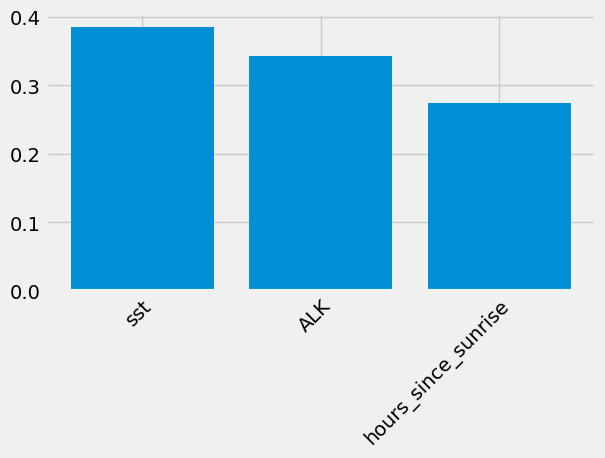

In [35]:
feature_importance('pro',feature_list_pro)

In [36]:
predictions, maes, rmses, perm_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [37]:
list_of_rmse['perm'] = perm_rmse
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['original'] - sorted_rmse['perm'])/sorted_rmse['original'] * 100, '%' )

{'perm': 2.846490542903358, 'max': 2.861116085374536, 'nutrients': 2.884299780505625, 'original': 2.9144836961405955, 'sunrise': 3.1965740858136718}
the percent improvement is: 2.3329399072389774 %
